# Anonymize Sensitive Data
Protecting sensitive information of individuals such as customers and employees is essential to any business. This template provides some techniques to introduce anonymity while still preserving data utility. It covers suppression, masking, and generalization.

You only need to have a dataset with columns that you want to anonymize to use this template. The first cell imports packages to manipulate and explore the data. It also imports the example data.

_Note: This template's placeholder dataset uses a fake HR dataset containing information about fictional employees._

In [1]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# Read in your data
df = pd.read_csv("data/employee.csv")

# Preview the data
df

,Name,Age,Department,Education,EmployeeNumber,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,PerformanceRating,YearsAtCompany,Zipcode,Email
0,Jason Taylor,41,Sales,2,1,Female,3,4,5993,3,6,65437,dalejennings@brown.com
1,Andre Chan,49,Research & Development,1,2,Male,2,2,5130,4,10,29211,itaylor@snow-olsen.com
2,Andrew Morgan,37,Research & Development,2,4,Male,2,3,2090,3,0,21410,connieadams@wheeler-mueller.com
3,Ryan Hayes,33,Research & Development,4,5,Female,3,3,2909,3,8,67099,sheilaevans@mercado-jones.com
4,Roy Hill,27,Research & Development,1,7,Male,3,2,3468,3,2,25397,orozcopaul@hamilton.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Dan Roberts,36,Research & Development,2,2061,Male,4,4,2571,3,5,77570,charleslewis@hatfield.net
1460,Michelle Scott,39,Research & Development,1,2062,Male,2,1,9991,3,7,71675,dmaldonado@armstrong.org
1461,Kevin Harris,27,Research & Development,3,2064,Male,4,2,6142,4,6,20146,curtisestes@duncan.com
1462,Stephen Ward,49,Sales,3,2065,Male,2,2,5390,3,9,66516,christopher83@manning.com


## Attribute Suppression
One of the first things you may want to do with new data is to perform attribute suppression: removing columns that are not useful to your analysis. Here, the template drops three columns that contain sensitive and personal information that may not be relevant to future analyses.

_Note: The cells in this template are designed to be run once, as they drop the original columns to leave you with a transformed dataset. If you want to rerun them, you can always load the original data again from the first cell._

In [2]:
# Specify columns to drop from the dataset
columns_to_drop = ["Name", "EmployeeNumber", "Gender"]

# Drop the columns
df.drop(columns_to_drop, axis="columns", inplace=True)

# Preview the resulting DataFrame
df

,Age,Department,Education,JobInvolvement,JobSatisfaction,MonthlyIncome,PerformanceRating,YearsAtCompany,Zipcode,Email
0,41,Sales,2,3,4,5993,3,6,65437,dalejennings@brown.com
1,49,Research & Development,1,2,2,5130,4,10,29211,itaylor@snow-olsen.com
2,37,Research & Development,2,2,3,2090,3,0,21410,connieadams@wheeler-mueller.com
3,33,Research & Development,4,3,3,2909,3,8,67099,sheilaevans@mercado-jones.com
4,27,Research & Development,1,3,2,3468,3,2,25397,orozcopaul@hamilton.com
...,...,...,...,...,...,...,...,...,...,...
1459,36,Research & Development,2,4,4,2571,3,5,77570,charleslewis@hatfield.net
1460,39,Research & Development,1,2,1,9991,3,7,71675,dmaldonado@armstrong.org
1461,27,Research & Development,3,4,2,6142,4,6,20146,curtisestes@duncan.com
1462,49,Sales,3,2,2,5390,3,9,66516,christopher83@manning.com


## Record Suppression
Alternatively, there may be cases where you want to perform record suppression: removing rows that are either not relevant to your analysis or have a risk of identification.

In this example, an early exploration of the data revealed that only one person has worked at the company for 37 years. As a result, reidentification may be easier. The record is then dropped from the data to protect this individual's identity. This example uses pandas' `.query()` method, which you can read more about in the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html).

_Note: This technique relates to a larger topic within privacy: K-anonymity. If you want to learn more about it, you can review this [video](https://campus.datacamp.com/courses/data-privacy-and-anonymization-in-python/more-on-privacy-preserving-techniques?ex=7)._

In [3]:
# Specify the query you wish to use here
query = "YearsAtCompany == 37"

# Create the mask based on your query
record_mask = df.query(query)

# Drop the record(s)
df.drop(record_mask.index, inplace=True)

# Run the query to confirm the data is dropped
df.query(query)

,Age,Department,Education,JobInvolvement,JobSatisfaction,MonthlyIncome,PerformanceRating,YearsAtCompany,Zipcode,Email


## Data Masking
If you want to preserve the column but remove all information entirely, you can use data masking. The example below performs data masking on columns with sensitive information, replacing the values with a series of four asterisks (`*`). The new masked columns (named "columnname_masked") are previewed next to the original column(s).

Finally, the original columns are dropped so that you are left with only the masked columns.

In [4]:
# Define columns you want to fully mask
full_columns = ["JobInvolvement", "JobSatisfaction"]

# Define the mask
full_mask = "****"

# Perform masking on specified columns
for col in full_columns:
    df[col + "_masked"] = full_mask

# Preview old and new columns
display(df[full_columns + [m + "_masked" for m in full_columns]])

# Drop original columns
df.drop(full_columns, axis="columns", inplace=True)

,JobInvolvement,JobSatisfaction,JobInvolvement_masked,JobSatisfaction_masked
0,3,4,****,****
1,2,2,****,****
2,2,3,****,****
3,3,3,****,****
4,3,2,****,****
...,...,...,...,...
1459,4,4,****,****
1460,2,1,****,****
1461,4,2,****,****
1462,2,2,****,****


## Partial Data Masking
Alternatively, you can perform partial data masking. Partial masking involves masking only part of the data. This can help preserve data utility while still maintaining a high level of privacy. In the example below, a new partial mask is applied to the `Zipcode` column by leaving only the first and final characters of the zip code and replacing the remaining characters with an asterisk (`*`).

For example, 29211 becomes 2\*\*\*1.

In [5]:
# Define the columns you want to partially mask
partial_columns = ["Zipcode"]

# Define the type and number of characters you wish to use as a mask
mask = "***"

# Perform partial masking on specified columns
for col in partial_columns:
    df[col + "_partially_masked"] = (
        df[col].astype("string").apply(lambda s: s[:1] + mask + s[-1])
    )

# Preview old and new columns
display(df[partial_columns + [m + "_partially_masked" for m in partial_columns]])

# Drop original columns
df.drop(partial_columns, axis="columns", inplace=True)

,Zipcode,Zipcode_partially_masked
0,65437,6***7
1,29211,2***1
2,21410,2***0
3,67099,6***9
4,25397,2***7
...,...,...
1459,77570,7***0
1460,71675,7***5
1461,20146,2***6
1462,66516,6***6


You may also want to apply partial masking to email addresses. The code below allows you to specify an email column. It then generates a partially-masked column where the domain name is preserved along with the first letter of the email, but the remaining information is removed.

In [6]:
# Define column containing email information
email_column = "Email"

# Perform partial masking on the specified column
df[email_column + "_partial_mask"] = df[email_column].apply(
    lambda s: s[0] + "****" + s[s.find("@") :]
)

# Preview the old and new column
display(df[[email_column, str(email_column + "_partial_mask")]])

# Drop the original column
df.drop(email_column, axis="columns", inplace=True)

,Email,Email_partial_mask
0,dalejennings@brown.com,d****@brown.com
1,itaylor@snow-olsen.com,i****@snow-olsen.com
2,connieadams@wheeler-mueller.com,c****@wheeler-mueller.com
3,sheilaevans@mercado-jones.com,s****@mercado-jones.com
4,orozcopaul@hamilton.com,o****@hamilton.com
...,...,...
1459,charleslewis@hatfield.net,c****@hatfield.net
1460,dmaldonado@armstrong.org,d****@armstrong.org
1461,curtisestes@duncan.com,c****@duncan.com
1462,christopher83@manning.com,c****@manning.com


## Data Generalization
Data generalization is used to reduce the precision of data. Generalization has the benefits of maintaining some data usability while still preserving anonymity. 

In the code below, columns are converted into binary values (0 and 1) based on their means. The resulting columns still indicate whether the original value was high or low but obscure the specific details.

As in other examples, the new generalized columns are previewed next to the original columns, and then the original columns are dropped.

In [7]:
# Specify the columns you wish to generalize into binary values
generalization_columns = ["PerformanceRating", "Education"]

# Perform generalization
for col in generalization_columns:
    col_mean = df[col].mean()
    df[col + "_generalized"] = df[col].apply(lambda x: 0 if x < col_mean else 1)

# Preview old and new columns
display(
    df[generalization_columns + [m + "_generalized" for m in generalization_columns]]
)

# Drop original columns
df.drop(generalization_columns, axis="columns", inplace=True)

,PerformanceRating,Education,PerformanceRating_generalized,Education_generalized
0,3,2,0,0
1,4,1,1,0
2,3,2,0,0
3,3,4,0,1
4,3,1,0,0
...,...,...,...,...
1459,3,2,0,0
1460,3,1,0,0
1461,4,3,1,1
1462,3,3,0,1


Alternatively, you can perform top and bottom coding to obscure outliers at a higher risk of identification. Again, this technique helps preserve the utility of the data while granting some anonymity for outliers (e.g., those with very high and very low salaries).

First, you can inspect the columns you suspect to have outliers using Seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function.

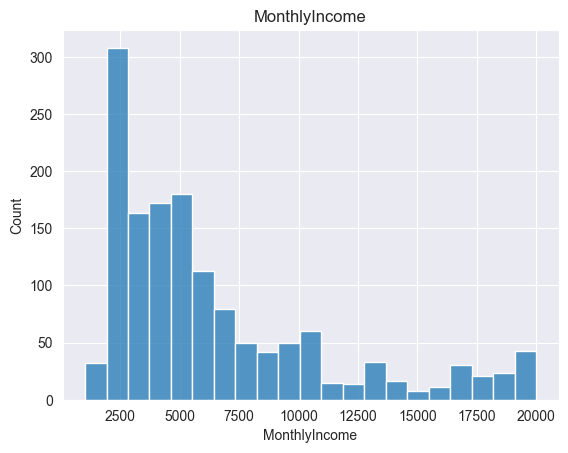

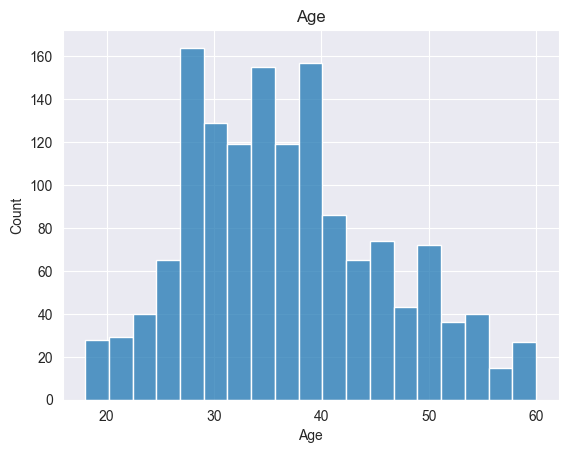

In [8]:
# Specify the columns you wish to inspect
outlier_columns = ["MonthlyIncome", "Age"]

# Generate a histogram for each column
for col in outlier_columns:
    sns.histplot(df[col])
    plt.title(col)
    plt.show()

After confirming the distributions of the variables, you can then proceed to top and bottom code the columns by replacing those at the ends of the curves with percentiles. In this example, all values less than or equal to the 5th percentile are recoded as the 5th percentile, and all values greater than or equal to the 95th percentile are recoded to the 95th percentile.

The same set of histograms is generated to inspect the new distributions, and the old columns are dropped.

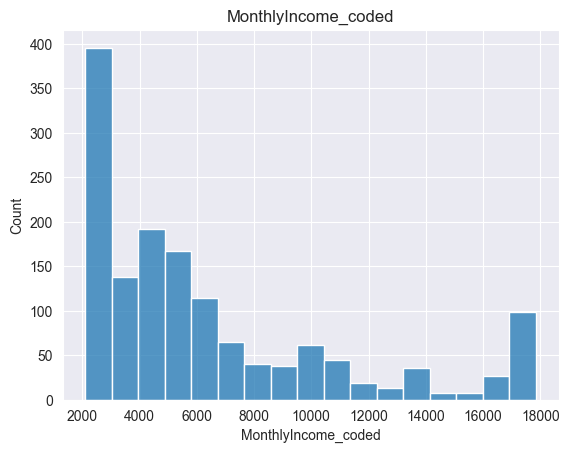

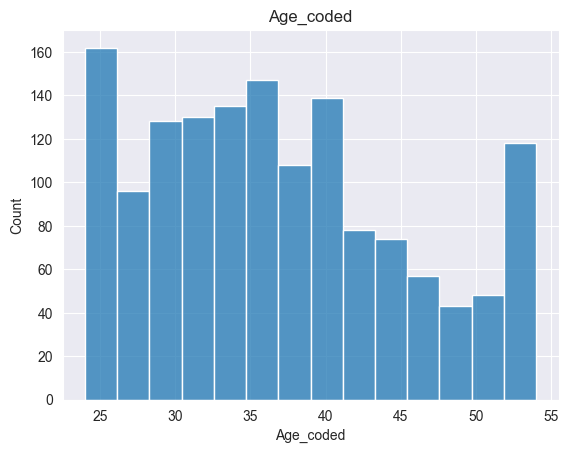

In [9]:
# Top and bottom code the 5th and 95th percentiles of each outlier column
for col in outlier_columns:
    lower = df[col].quantile([0.05, 0.95]).iloc[0]
    upper = df[col].quantile([0.05, 0.95]).iloc[1]
    df[col + "_coded"] = df[col].apply(
        lambda x: lower if x <= lower else (upper if x >= upper else x)
    )

# Generate a histogram for each coded column to confirm
for col in outlier_columns:
    sns.histplot(df[col + "_coded"])
    plt.title(col + "_coded")
    plt.show()

# Drop the original columns
df.drop(outlier_columns, axis="columns", inplace=True)

If you want to learn more about anonymity, we highly encourage you to check out [Data Privacy and Anonymization in Python](https://app.datacamp.com/learn/courses/data-privacy-and-anonymization-in-python). This course will introduce you to further techniques for anonymizing data and explore advanced topics such as k-anonymity and differential privacy.